In [25]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
data = pd.read_csv('data/chennai_temp.csv')
data

,Month,Day,Year,Temp,TimeStamp
0,1,1,1995,72.4,1995-01-01
1,1,2,1995,73.5,1995-01-02
2,1,3,1995,72.6,1995-01-03
3,1,4,1995,75.2,1995-01-04
4,1,5,1995,74.8,1995-01-05
...,...,...,...,...,...
9261,5,9,2020,90.1,2020-05-09
9262,5,10,2020,89.4,2020-05-10
9263,5,11,2020,89.5,2020-05-11
9264,5,12,2020,87.5,2020-05-12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9266 entries, 0 to 9265
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Month      9266 non-null   int64  
 1   Day        9266 non-null   int64  
 2   Year       9266 non-null   int64  
 3   Temp       9266 non-null   float64
 4   TimeStamp  9266 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 362.1+ KB


In [4]:
print("Null values count:", (data['Temp']==-99).sum())

Null values count: 29


In [12]:
# removing null values with the previous time stamp value
for i in data[data['Temp']==-99].index:
    data['Temp'][i] = data['Temp'][i-1]
    

In [6]:
scaler = MinMaxScaler()
X = data['Temp'].values
X = scaler.fit_transform(X.reshape(-1, 1))
X = X.reshape(1, -1)

In [15]:
def generate_data(data, time_steps):
    X = []
    Y = []
    for i in range(len(data[0])-time_steps):
        x = data[0][i: i+time_steps]
        X.append(x)
        Y.append(data[0][i+time_steps])
    return np.array(X).reshape(-1, 1, time_steps), np.array(Y)

In [130]:
steps = 8
x, y = generate_data(X, steps)

In [107]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [108]:
from tensorflow.keras import layers, Sequential

In [114]:
model = Sequential([
    layers.LSTM(7, input_shape=(1, steps)),
    layers.Dense(1)
])

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics= ['mean_squared_error'])

In [115]:
epochs = 25
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Train on 7408 samples, validate on 1853 samples
Epoch 1/25
7408/7408 [==============================] - 3s 374us/sample - loss: 0.1014 - mean_squared_error: 0.1014 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 2/25
7408/7408 [==============================] - 1s 89us/sample - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0069 - val_mean_squared_error: 0.0069
Epoch 3/25
7408/7408 [==============================] - 1s 88us/sample - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0058 - val_mean_squared_error: 0.0058
Epoch 4/25
7408/7408 [==============================] - 1s 89us/sample - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 5/25
7408/7408 [==============================] - 1s 89us/sample - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0048 - val_mean_squared_error: 0.0048
Epoch 6/25
7408/7408 [==============================] - 1s 89us/sample - loss: 0.0050 - mean_squared_error: 0.0050 -

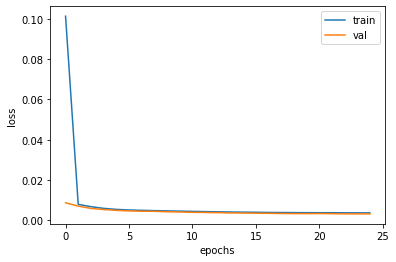

In [116]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
xx = list(range(epochs))

plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(xx, tr_loss, label='train')
plt.plot(xx, val_loss, label='val')
plt.legend()
plt.show()

In [117]:
y_pred = model.predict(x_test)

In [120]:
def plot_prediction(y_test, y_pred, l=0, r=-1):
    xx = list(range(len(x_test)))[l:r]
    y1 = y_test[l:r]
    y2 = y_pred[l:r]
    plt.figure(figsize=(12, 7))
    plt.ylabel('Temp')
    plt.plot(xx, scaler.inverse_transform(y1.reshape(-1,1)).reshape(1, -1)[0], label='actual')
    plt.plot(xx, scaler.inverse_transform(y2.reshape(-1,1)).reshape(1, -1)[0], label='predicted')
    plt.legend()
    plt.show()

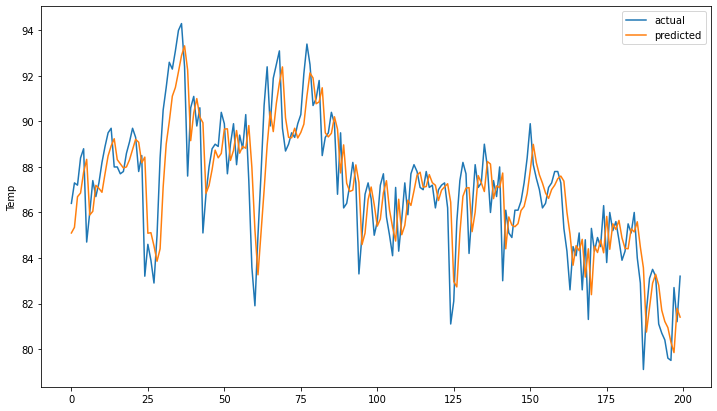

In [129]:
plot_prediction(y_test, y_pred, 0, 200)